In [1]:
# Create heatmaps of 12 protocols generated using H1-hESC, HFF or END using mcool files.

In [2]:
%matplotlib inline
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
mpl.style.use('seaborn-white')
import multiprocess as mp
import numpy as np
import pandas as pd
import bioframe
import cooltools
import cooler
#import bbi
from cooltools import snipping
from cooltools.lib import numutils

In [3]:
path=cooler_path
out=output_path


In [9]:

filename1="U54-HFF-plate-FA-MNase-20190509-R2-T1__hg38.hg38.mapq_30.1000.mcool"
filename2="U54-HFF-plate-EGS-MNase-20190509-R2-T1__hg38.hg38.mapq_30.1000.mcool"
filename3="U54-HFF-plate-DSG-MNase-20190509-R2-T1__hg38.hg38.mapq_30.1000.mcool"
filename4="U54-HFF-plate-FA-DdeI-20170119-R2-T1__hg38.hg38.mapq_30.1000.mcool"
filename5="U54-HFF-plate-EGS-DdeI-20161031-R1-T1__hg38.hg38.mapq_30.1000.mcool"
filename6="U54-HFF-plate-DSG-DdeI-20160812-R1-T1__hg38.hg38.mapq_30.1000.mcool"
filename7="U54-HFF-plate-FA-DpnII-20180904-R1-T1__hg38.hg38.mapq_30.1000.mcool"
filename8="U54-HFF-plate-EGS-DpnII-20160902-R1-T1__hg38.hg38.mapq_30.1000.mcool"
filename9="U54-HFF-plate-DSG-DpnII-20170119-R2-T1__hg38.hg38.mapq_30.1000.mcool"
filename10="U54-HFF-plate-FA-HindIIII-20160226-R2-T1__hg38.hg38.mapq_30.1000.mcool"
filename11="U54-HFF-plate-EGS-HindIII-20190718-R2-T1__hg38.hg38.mapq_30.1000.mcool"
filename12="U54-HFF-plate-DSG-HindIII-20160226-R1-T1__hg38.hg38.mapq_30.1000.mcool"




In [18]:

filename1="U54-ESC-FA-MNase-20170508-R1-T1__hg38.hg38.mapq_30.1000.mcool"
filename2="U54-ESC-EGS-MNase-20170508-R1-T1__hg38.hg38.mapq_30.1000.mcool"
filename3="U54-ESC-DSG-MNase-20170508-R2-T1__hg38.hg38.mapq_30.1000.mcool"
filename4="U54-ESC-FA-DdeI-20190711-R2-T1__hg38.hg38.mapq_30.1000.mcool"
filename5="U54-ESC-EGS-DdeI-20161118-R1-T1__hg38.hg38.mapq_30.1000.mcool"
filename6="U54-ESC-DSG-DdeI-20161014-R1-T1__hg38.hg38.mapq_30.1000.mcool"
filename7="U54-ESC-FA-DpnII-20170119-R2-T1__hg38.hg38.mapq_30.1000.mcool"
filename8="U54-ESC-EGS-DpnII-20170119-R2-T1__hg38.hg38.mapq_30.1000.mcool"
filename9="U54-ESC-DSG-DpnII-20160722-R1-T1__hg38.hg38.mapq_30.1000.mcool"
filename10="U54-ESC-FA-HindIII-20160311-R1-T1__hg38.hg38.mapq_30.1000.mcool"
filename11="U54-ESC-EGS-HindIII-20161206-R1-T1__hg38.hg38.mapq_30.1000.mcool"
filename12="U54-ESC-DSG-HindIII-20161206-R1-T1__hg38.hg38.mapq_30.1000.mcool"




In [22]:
filename1="U54-END-FA-MNase-20170508-R1-T1__hg38.hg38.mapq_30.1000.mcool"
filename2="U54-END-EGS-MNase-20170508-R1-T1__hg38.hg38.mapq_30.1000.mcool"
filename3="U54-END-DSG-MNase-20170508-R1-T1__hg38.hg38.mapq_30.1000.mcool"
filename4="U54-END-FA-DdeI-20161118-R1-T1__hg38.hg38.mapq_30.1000.mcool"
filename5="U54-END-EGS-DdeI-20161219-R1-T1__hg38.hg38.mapq_30.1000.mcool"
filename6="U54-END-DSG-DdeI-20161031-R1-T1__hg38.hg38.mapq_30.1000.mcool"
filename7="U54-END-FA-DpnII-20170119-R2-T1__hg38.hg38.mapq_30.1000.mcool"
filename8="U54-END-EGS-DpnII-20170119-R2-T1__hg38.hg38.mapq_30.1000.mcool"
filename9="U54-END-DSG-DpnII-20190711-R2-T1__hg38.hg38.mapq_30.1000.mcool"
filename10="U54-END-FA-HindIII-20160311-R1-T1__hg38.hg38.mapq_30.1000.mcool"
filename11="U54-END-EGS-HindIII-20161219-R1-T1__hg38.hg38.mapq_30.1000.mcool"
filename12="U54-END-DSG-HindIII-20161206-R1-T1__hg38.hg38.mapq_30.1000.mcool"




In [10]:
hg38 = bioframe.fetch_chromsizes('hg38')
chromsizes = bioframe.fetch_chromsizes('hg38')
chromosomes = list(chromsizes.index)

print(filename1,filename2,filename3,filename4,filename5,filename6,filename7,filename8,filename9,filename10,filename11,filename12)

conditions = ['FA_MNase','EGS_MNase','DSG_MNase','FA_DdeI','EGS_DdeI','DSG_DdeI','FA_DpnII','EGS_DpnII','DSG_DpnII','FA_HindIII','EGS_HindIII','DSG_HindIII']


cool = [filename1,filename2,filename3,filename4,filename5,filename6,filename7,filename8,filename9,filename10,filename11,filename12]


cooler_paths = {    
    'FA_MNase' : path+filename1+'::/resolutions/250000',
    'EGS_MNase' : path+filename2+'::/resolutions/250000',
    'DSG_MNase' : path+filename3+'::/resolutions/250000',
    'FA_DdeI' : path+filename4+'::/resolutions/250000',
    'EGS_DdeI' : path+filename5+'::/resolutions/250000',
    'DSG_DdeI' : path+filename6+'::/resolutions/250000',
    'FA_DpnII' : path+filename7+'::/resolutions/250000',
    'EGS_DpnII' : path+filename8+'::/resolutions/250000',
    'DSG_DpnII' : path+filename9+'::/resolutions/250000',
    'FA_HindIII' : path+filename10+'::/resolutions/250000',
    'EGS_HindIII' : path+filename11+'::/resolutions/250000',
    'DSG_HindIII' : path+filename12+'::/resolutions/250000',
    
}


long_names = {
    'FA_MNase': 'FA_MNase',
    'EGS_MNase':'EGS_MNase',
    'DSG_MNase': 'DSG_MNase',
    'FA_DdeI' :'FA_DdeI' ,
    'EGS_DdeI' :'EGS_DdeI' ,
    'DSG_DdeI' :'DSG_DdeI' ,
    'FA_DpnII': 'FA_DpnII',
    'EGS_DpnII': 'EGS_DpnII',
    'DSG_DpnII': 'DSG_DpnII',
    'FA_HindIII': 'FA_HindIII',
    'EGS_HindIII': 'EGS_HindIII',
    'DSG_HindIII': 'DSG_HindIII',
}

clrs = {
    cond: cooler.Cooler(cooler_paths[cond]) for cond in conditions
}



U54-HFF-plate-FA-MNase-20190509-R2-T1__hg38.hg38.mapq_30.1000.mcool U54-HFF-plate-EGS-MNase-20190509-R2-T1__hg38.hg38.mapq_30.1000.mcool U54-HFF-plate-DSG-MNase-20190509-R2-T1__hg38.hg38.mapq_30.1000.mcool U54-HFF-plate-FA-DdeI-20170119-R2-T1__hg38.hg38.mapq_30.1000.mcool U54-HFF-plate-EGS-DdeI-20161031-R1-T1__hg38.hg38.mapq_30.1000.mcool U54-HFF-plate-DSG-DdeI-20160812-R1-T1__hg38.hg38.mapq_30.1000.mcool U54-HFF-plate-FA-DpnII-20180904-R1-T1__hg38.hg38.mapq_30.1000.mcool U54-HFF-plate-EGS-DpnII-20160902-R1-T1__hg38.hg38.mapq_30.1000.mcool U54-HFF-plate-DSG-DpnII-20170119-R2-T1__hg38.hg38.mapq_30.1000.mcool U54-HFF-plate-FA-HindIIII-20160226-R2-T1__hg38.hg38.mapq_30.1000.mcool U54-HFF-plate-EGS-HindIII-20190718-R2-T1__hg38.hg38.mapq_30.1000.mcool U54-HFF-plate-DSG-HindIII-20160226-R1-T1__hg38.hg38.mapq_30.1000.mcool


/home/ba69w/tools/miniconda3/envs/cooler-env/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log10
  # Remove the CWD from sys.path while we load stuff.


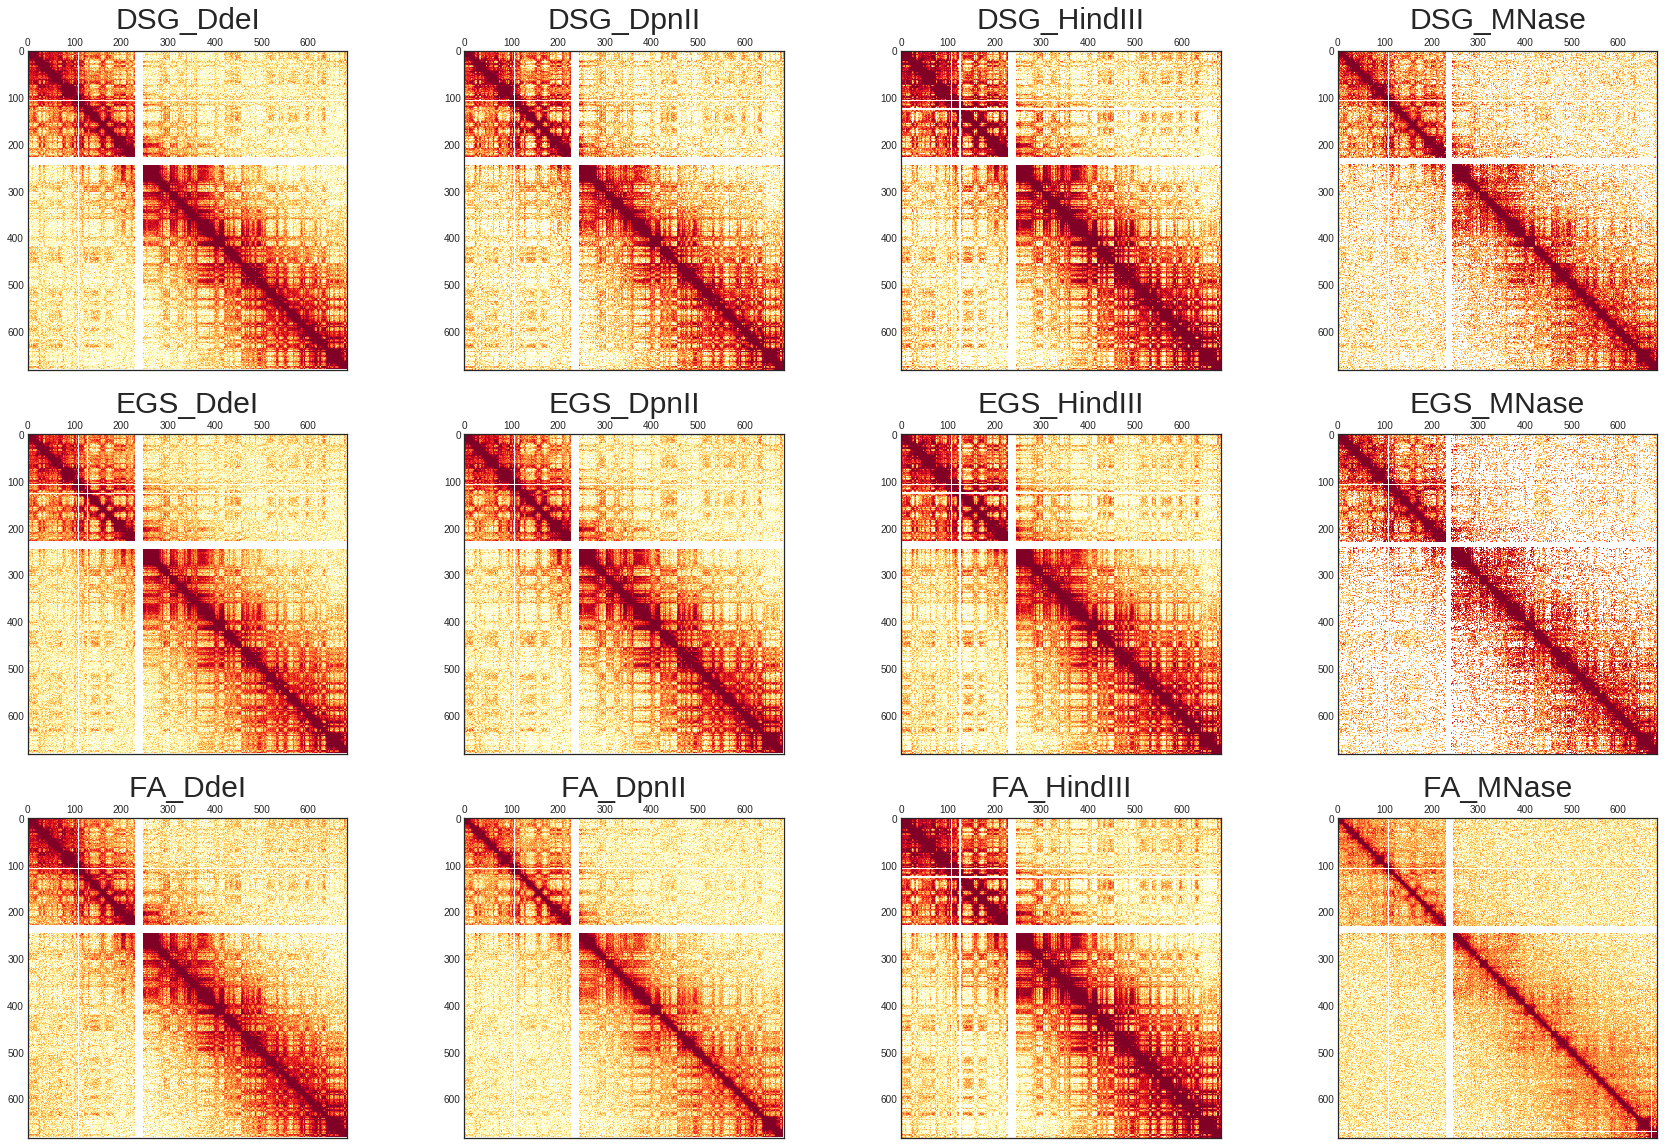

In [10]:
fig = plt.figure(figsize=(30,20))
gs = gridspec.GridSpec(nrows=3,ncols=4)
#ax = plt.subplot(gs[2,4])

for k,cond in enumerate(np.sort(conditions)):
        ax = plt.subplot(gs[k])
        x,y=clrs[cond].extent("chr12")
        mat = clrs[cond].matrix(balance=True, sparse=True)[x:y, x:y]
        arr = mat.toarray()
        im =ax.matshow(np.log10(arr), cmap='YlOrRd',vmin=-4,vmax=-2.5)
        ax.set_title(long_names[cond], fontdict={'fontsize': 30, 'fontweight': 'medium'})
        #k=k+1
        #plt.colorbar(im)
    #l=l+1
#plt.savefig('filaname.pdf')